In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

office_data_path = "Resources/the_office_series.csv"

office_metadata = pd.read_csv(office_data_path)

office_metadata.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


## Cleaning the data

In [2]:
#Start cleaning the DF
clean_df = office_metadata.rename(columns={"Unnamed: 0":"Episode", "Viewership": "Viewership(MM)"})
clean_df = clean_df.drop('Episode', 1)
clean_df = clean_df.drop('About', 1)


clean_df.head()

C:\Users\matth\AppData\Local\Temp/ipykernel_8312/2066472352.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  clean_df = clean_df.drop('Episode', 1)
C:\Users\matth\AppData\Local\Temp/ipykernel_8312/2066472352.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  clean_df = clean_df.drop('About', 1)


,Season,EpisodeTitle,Ratings,Votes,Viewership(MM),Duration,Date,GuestStars,Director,Writers
0,1,Pilot,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,Diversity Day,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,1,Health Care,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,1,The Alliance,8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,1,Basketball,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [3]:
#Exporting to csv to use
clean_df.to_csv('Resources/office_clean.csv', index=False)

##  Data Analysis

In [4]:
office_data_path = "Resources/Office_clean.csv"

office_clean = pd.read_csv(office_data_path)

office_clean.head()

,Season,EpisodeTitle,Ratings,Votes,Viewership(MM),Duration,Date,GuestStars,Director,Writers
0,1,Pilot,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,Diversity Day,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,1,Health Care,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,1,The Alliance,8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,1,Basketball,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [5]:
# Using the aggregation method, produce summary statistics in a single line
view_agg_df = office_clean.groupby(['Season'])['Viewership(MM)'].agg(['mean'])
view_agg_df


,mean
Season,
1,6.366667
2,8.168182
3,8.494348
4,8.547857
5,8.756538
6,7.766154
7,7.305833
8,5.385417
9,4.138696


In [6]:
top_viewed = office_clean.nlargest(5, ['Viewership(MM)'])


top_viewed

,Season,EpisodeTitle,Ratings,Votes,Viewership(MM),Duration,Date,GuestStars,Director,Writers
77,5,Stress Relief,9.7,8170,22.91,60,1 February 2009,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein
0,1,Pilot,7.5,4936,11.20,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
17,2,The Injury,9.1,4314,10.30,22,12 January 2006,NaN,Bryan Gordon,Mindy Kaling
40,3,The Return,8.8,3211,10.20,28,18 January 2007,NaN,Greg Daniels,Lee Eisenberg | Gene Stupnitsky | Michael Schur
39,3,Traveling Salesmen,8.6,3053,10.12,22,11 January 2007,NaN,Greg Daniels,Michael Schur | Lee Eisenberg | Gene Stupnitsky


## Visualizing the most popular and least popular shows in the Office

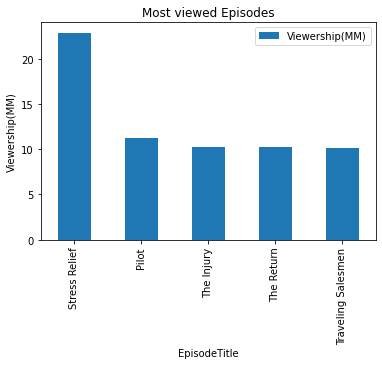

In [7]:
top_viewed.plot(x="EpisodeTitle", y="Viewership(MM)", kind="bar")
plt.title("Most viewed Episodes")
plt.ylabel("Viewership(MM)")
plt.xlabel('EpisodeTitle')
plt.show()

In [8]:
least_viewed = office_clean.nsmallest(5, ['Viewership(MM)'])

least_viewed

,Season,EpisodeTitle,Ratings,Votes,Viewership(MM),Duration,Date,GuestStars,Director,Writers
184,9,Paper Airplane,8.0,2007,3.25,22,25 April 2013,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein
182,9,Promos,8.0,1924,3.44,22,4 April 2013,Ryan Howard,Jennifer Celotta,Tim McAuliffe
185,9,Livin' the Dream,9.0,2831,3.51,42,2 May 2013,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright
181,9,The Farm,7.5,2189,3.54,22,14 March 2013,NaN,Paul Lieberstein,Paul Lieberstein
183,9,Stairmageddon,8.0,1985,3.83,22,11 April 2013,NaN,Matt Sohn,Dan Sterling


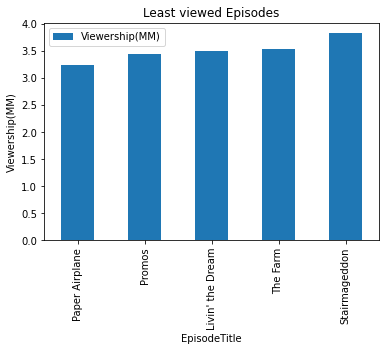

In [9]:
least_viewed.plot(x="EpisodeTitle", y="Viewership(MM)", kind="bar")
plt.title("Least viewed Episodes")
plt.ylabel("Viewership(MM)")
plt.xlabel('EpisodeTitle')
plt.show()

In [10]:
top_rated = office_clean.nlargest(5, ['Ratings'])
top_rated

,Season,EpisodeTitle,Ratings,Votes,Viewership(MM),Duration,Date,GuestStars,Director,Writers
137,7,"Goodbye, Michael",9.8,8059,8.42,50,28 April 2011,NaN,Paul Feig,Greg Daniels
187,9,Finale,9.8,10515,5.69,51,16 May 2013,"Joan Cusack, Ed Begley Jr, Rachel Harris, Nanc...",Ken Kwapis,Greg Daniels
77,5,Stress Relief,9.7,8170,22.91,60,1 February 2009,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein
59,4,Dinner Party,9.5,5601,9.22,30,10 April 2008,NaN,Paul Feig,Gene Stupnitsky | Lee Eisenberg
186,9,A.A.R.M.,9.5,3914,4.56,43,9 May 2013,NaN,David Rogers,Brent Forrester


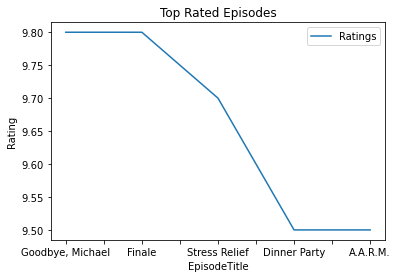

In [16]:
top_rated.plot(x="EpisodeTitle", y="Ratings", kind="line")
plt.title("Top Rated Episodes")
plt.ylabel("Rating")
plt.xlabel('EpisodeTitle')
plt.show()

In [18]:
lowest_rated = office_clean.nsmallest(5, ['Ratings'])
lowest_rated

,Season,EpisodeTitle,Ratings,Votes,Viewership(MM),Duration,Date,GuestStars,Director,Writers
159,8,Get the Girl,6.6,2203,4.87,23,15 March 2012,NaN,Rainn Wilson,Charlie Grandy
104,6,The Banker,6.8,3039,7.29,30,21 January 2010,NaN,Jeffrey Blitz,Jason Kessler
148,8,Gettysburg,6.9,2089,5.50,23,17 November 2011,NaN,Jeffrey Blitz,Robert Padnick
161,8,Angry Andy,7.0,2107,4.35,23,19 April 2012,NaN,Claire Scanlon,Justin Spitzer
162,8,Fundraiser,7.0,1902,4.17,23,26 April 2012,NaN,David Rogers,Owen Ellickson


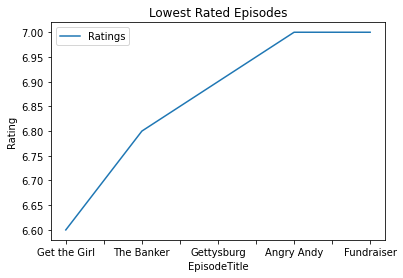

In [19]:
lowest_rated.plot(x="EpisodeTitle", y="Ratings", kind="line")
plt.title("Lowest Rated Episodes")
plt.ylabel("Rating")
plt.xlabel('EpisodeTitle')
plt.show()